### Adapted from Coursera Deep Learning Speciality: Improving Deep Neural Networks: Hyperparameter tuning, regularization, optimization

#### Regularization

#### offered by deeplearning.ai

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from deepnn import io
from deepnn import models
from deepnn import predict

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

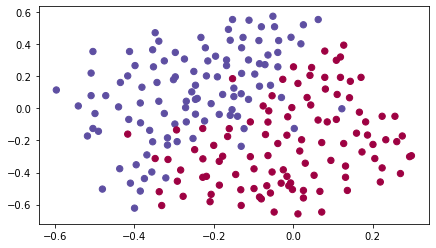

In [9]:
train_X, train_Y, test_X, test_Y = io.load_2D_dataset()

In [10]:
L_dims = [train_X.shape[0], 20, 3, 1]

Cost after iteration 0: 0.729777
Cost after iteration 1000: 0.219047
Cost after iteration 2000: 0.210419
Cost after iteration 3000: 0.191946
Cost after iteration 4000: 0.201809
Cost after iteration 5000: 0.178020
Cost after iteration 6000: 0.175878
Cost after iteration 7000: 0.165121
Cost after iteration 8000: 0.153655
Cost after iteration 9000: 0.144195
Cost after iteration 10000: 0.147038
Cost after iteration 11000: 0.133641
Cost after iteration 12000: 0.123295
Cost after iteration 13000: 0.132338
Cost after iteration 14000: 0.123251
Cost after iteration 15000: 0.124086
Cost after iteration 16000: 0.116471
Cost after iteration 17000: 0.123880
Cost after iteration 18000: 0.118733
Cost after iteration 19000: 0.184591
Cost after iteration 20000: 0.107855
Cost after iteration 21000: 0.111633
Cost after iteration 22000: 0.114832
Cost after iteration 23000: 0.118813
Cost after iteration 24000: 0.087718


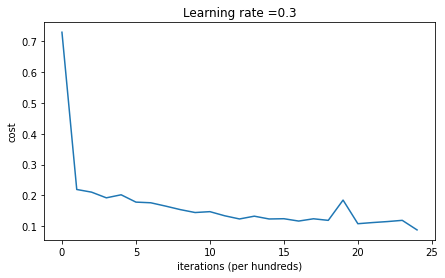

In [18]:
#initialization options: zeros, random, he, deep
init = "he"
parameters = models.L_layer_model(train_X, train_Y, L_dims, 
                                  learning_rate=0.3, num_iterations=25000, 
                                  print_cost=True, initialization = "deep")

In [20]:
print ("On the training set:")
predictions_train = predict.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict.predict(test_X, test_Y, parameters)

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.9349999999999998


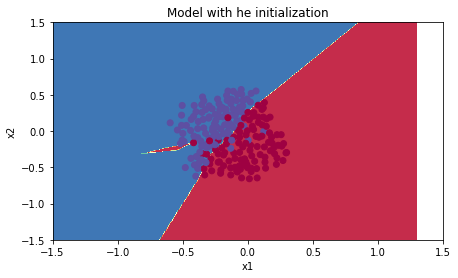

In [21]:
plt.title("Model with {init} initialization".format(init=init))
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
io.plot_decision_boundary(lambda x: predict.predict_dec(parameters, x.T), train_X, train_Y)

In [22]:
parameters

{'W1': array([[ 8.09048129e+00, -3.33784360e+00],
        [-2.19365977e+00, -2.04334095e+00],
        [ 5.17982656e+00, -7.44542294e+00],
        [ 5.01367036e+00, -3.34404888e-01],
        [ 2.42657215e+00, -2.52280064e+00],
        [ 1.93329784e+00, -3.28976745e+00],
        [-1.48700059e+00, -1.35390696e+00],
        [ 3.02225868e+00, -4.18431946e-01],
        [ 6.96735398e-01, -4.69742874e+00],
        [ 1.21730761e+00,  4.94516616e+00],
        [-3.16472849e+00,  1.68886311e+00],
        [ 1.95553459e+00,  7.86011999e-01],
        [ 5.96306444e+00, -6.14970654e+00],
        [ 7.39282859e-01, -4.13836399e+00],
        [-1.46182352e+00,  1.46818481e+00],
        [-5.67318511e-03, -1.66465362e-01],
        [ 6.98835784e-01, -3.72327340e+00],
        [-2.86434033e+00,  5.16293004e-01],
        [-4.20762875e+00,  2.24519179e+00],
        [ 1.29486980e+00,  5.48624869e+00]]),
 'b1': array([[ 1.13535752],
        [-0.75387407],
        [-0.1028018 ],
        [ 1.75471453],
        [-0.30

In [23]:
np.array([np.sum(np.square(parameters['W1'])),np.sum(np.square(parameters['W2'])),np.sum(np.square(parameters['W3']))])

array([471.77458791, 171.7687435 ,  36.69726616])

In [48]:
sum_squares

array([471.77458791, 171.7687435 ,  36.69726616])

In [49]:
def compute_cost_with_regularization_test_case():
    np.random.seed(1)
    Y_assess = np.array([[1, 1, 0, 1, 0]])
    W1 = np.random.randn(2, 3)
    b1 = np.random.randn(2, 1)
    W2 = np.random.randn(3, 2)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    a3 = np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]])
    return a3, Y_assess, parameters

In [50]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()